# Aula 03 - NLTK

Professor: Luiz Frias 
- Email: l.frias@poli.ufrj.br
- Linkedin: in/luizfrias/
- Twitter: @lfdefrias

O NLTK foi criado em 2001 como parte do curso de linguística computacional na Universidade da Pensilvânia. 

Neste caderno vamos aprender como o NLTK pode nos ajudar em uma variedade de tarefas no contexto de NLP.

**Referência:** Natural Language Processing With Python

In [1]:
import nltk

### Corpora (nltk.corpus)

O NLTK possui diferentes corpora para exploração. Para utilização dos textos, você deve fazer o download do corpus correspondente e posteriormente importá-lo. Cada corpus foi compilado com um objetivo: POS tagging, NER e tópicos são alguns dos exemplos. 

Alguns dos corpus mais famosos são:
- Gutenberg: 25k livros eletrônicos
- Brown: corpus da Brown University, com 1mi de palavras, criado em 1961. 
- Reuters: mais de 70k notícias classificadas em 90 tópicos
- Stopwords: stopwords para 11 idiomas
- Floresta Treebank: 9k sentenças, POS tag (em português)

In [2]:
from nltk.corpus import machado

In [3]:
print (machado.readme())

Machado de Assis -- Obra Completa

http://machado.mec.gov.br/

Public Domain

Contents:

Romance

romance/marm01.txt: Ressurreição (1872)
romance/marm02.txt: A Mão e a Luva (1874)
romance/marm03.txt: Helena (1876)
romance/marm04.txt: Iaiá Garcia (1878)
romance/marm05.txt: Memórias Póstumas de Brás Cubas (1881)
romance/marm06.txt: Casa Velha (1885)
romance/marm07.txt: Quincas Borba (1891)
romance/marm08.txt: Dom Casmurro (1899)
romance/marm09.txt: Esaú e Jacó (1904)
romance/marm10.txt: Memorial de Aires (1908)

Poesia

poesia/maps01.txt: Crisálidas (1864)
poesia/maps02.txt: Falenas (1870)
poesia/maps03.txt: Americanas (1875)
poesia/maps04.txt: Gazeta de Holanda (1886-88)
poesia/maps05.txt: Ocidentais (1901)
poesia/maps06.txt: O Almada (1908)
poesia/maps07.txt: Dispersas (1854-1939)

Contos

contos/macn001.txt: Contos Fluminenses (1870); Miss Dollar; Luís Soares; A mulher de preto; O segredo de Augusta; Confissões de uma viúva moça; Linha reta e linha curva; Frei Sim
contos/macn002.txt: 

Para abrir um arquivo do corpus, basta referenciá-lo pelo seu identificador. Vamos trabalhar com o livro  Memórias Póstumas de Brás Cubas (identificador `romance/marm05.txt`)

In [4]:
mpbc_text = machado.raw('romance/marm05.txt')
print (mpbc_text[800:1800])

o
público.

Capistrano de Abreu, noticiando a
publicação do livro, perguntava: As Memórias Póstumas de Brás Cubas são
um romance? Macedo Soares, em carta que me escreveu por esse tempo, recordava
amigamente as Viagens na minha terra. Ao primeiro respondia já o defunto
Brás Cubas (como o leitor viu e verá no prólogo dele que vai adiante) que sim e
que não, que era romance para uns e não o era para outros. Quanto ao segundo,
assim se explicou o finado: Trata-se de uma obra difusa, na qual eu, Brás
Cubas, se adotei a forma livre de um Sterne ou de um Xavier de Maistre, não sei
se lhe meti algumas rabugens de pessimismo. Toda essa gente viajou: Xavier de
Maistre à roda do quarto, Garret na terra dele, Sterne na terra dos outros. De
Brás Cubas se pode dizer que viajou à roda da vida.

O que faz do meu Brás Cubas um
autor particular é o que ele chama rabugens de pessimismo. Há na alma deste
livro, por mais risonho que pareça, um sentimento amargo e áspero, que está
longe de vir de seus

O NLTK possui a classe `Text` que facilita a exploração de textos. 

Da documentação: *Its methods perform a variety of analyses
on the text's contexts (e.g., counting, concordancing, collocation
discovery), and display the results.  If you wish to write a
program which makes use of these analyses, then you should bypass
the ``Text`` class, and use the appropriate analysis function or
class directly instead.*

In [5]:
from nltk.text import Text

In [6]:
mpbc_words = machado.words('romance/marm05.txt')

In [7]:
mpbc = Text(mpbc_words, name="Memórias Póstumas de Brás Cubas (1881)")

O método `concordance` procura pela palavra especificada no texto e mostra as suas ocorrências em contexto.

In [8]:
mpbc.concordance('defunto')

Displaying 8 of 8 matches:
 terra . Ao primeiro respondia já o defunto Brás Cubas ( como o leitor viu e ve
is para não entrar na crítica de um defunto , que se pintou a si e a outros , c
ue eu não sou propriamente um autor defunto , mas um defunto autor , para quem 
priamente um autor defunto , mas um defunto autor , para quem a campa foi outro
e a atitude lhe dava a imagem de um defunto . Ultimamente , restituído à forma 
ranqueza é a primeira virtude de um defunto . Na vida , o olhar da opinião , o 
o . O melhor de tudo era esquecer o defunto , um lorpa , um cainho sem nome , e
 recuou , como se fosse um beijo de defunto . CAPÍTULO XCVII / ENTRE A BOCA E A


O método `similar` procura todas as palavras `w'` que aparecem no mesmo trigrama `w1 w w2` em substituição à palavra `w` buscada. 

In [9]:
mpbc.similar('defunto')

papel capítulo dia beijo que um leitor sentimento isto discurso amigo
cotrim solteirão mal emplasto mim temporal homem filho sujeito


In [10]:
mpbc.similar('o', num=50)

um me é a ao por não de do assim no eu e este meu era lhe ele muito em
que mais para ainda sim isso possível homem virgília disse claro foi
esse tempo uma sei outro digo melhor algum isto vulgar sou bom pouco
dizia nada então confessar natural


In [11]:
mpbc.similar('disse')

que dizia e para não eu de era é muito creio dava acrescentou a foi o
por dizer mas digo


`FreqDist` mapeia cada saída de um experimento ao número de vezes em que ele ocorre.

In [12]:
from nltk.probability import FreqDist

In [13]:
fd = FreqDist(mpbc_words)

In [14]:
fd.most_common(20)

[(',', 6918),
 ('.', 2921),
 ('a', 2430),
 ('que', 2133),
 ('de', 2063),
 ('e', 1823),
 ('-', 1748),
 ('o', 1618),
 (';', 1260),
 ('me', 978),
 ('um', 923),
 ('não', 911),
 ('\x97', 745),
 ('se', 712),
 ('do', 680),
 ('da', 644),
 ('uma', 631),
 ('com', 559),
 ('os', 483),
 ('é', 477)]

Repare que as palavras mais comuns são pontuações e stopwords (token sem significado semântico). O NLTK conta com uma lista de stopwords para português.

In [15]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords[:10], len(stopwords)

(['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um'], 204)

In [16]:
def is_pontuacao(word):
    return word in [',', '.', ';', ':', '-', '!', '?', '/', '\'', '...']
def is_stopword(word):
    return word in stopwords

In [17]:
print ('%d palavras' % len(mpbc_words))
print ('%d palavras, removendo pontuação' % len([w for w in mpbc_words if not is_pontuacao(w)]))
print ('%d palavras, removendo pontuação e stopwords' % len(
    [w for w in mpbc_words if not (is_pontuacao((w)) or is_stopword(w.lower()))]))

print ('%d palavras únicas, removendo pontuação e stopwords' % len(
    set([w for w in mpbc_words if not (is_pontuacao(w) or is_stopword(w.lower()))])))

77098 palavras
63027 palavras, removendo pontuação
34465 palavras, removendo pontuação e stopwords
10547 palavras únicas, removendo pontuação e stopwords


In [18]:
mpbc_words_clean = [w for w in mpbc_words if not (is_pontuacao(w) or is_stopword(w.lower()))]

In [19]:
fd = FreqDist(mpbc_words_clean)
fd.most_common(20)

[('\x97', 745),
 ('ele', 213),
 ('Virgília', 193),
 ('disse', 176),
 ('CAPÍTULO', 160),
 ('coisa', 148),
 ('olhos', 137),
 ('outro', 123),
 ('vida', 116),
 ('nada', 114),
 ('tempo', 113),
 ('menos', 110),
 ('outra', 109),
 ('homem', 106),
 ('casa', 106),
 ('porque', 105),
 ('mim', 100),
 ('ser', 97),
 ('pouco', 96),
 ('tão', 92)]

In [20]:
import matplotlib.pyplot as plt

/opt/miniconda3/envs/text/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/miniconda3/envs/text/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0, flags=flags)


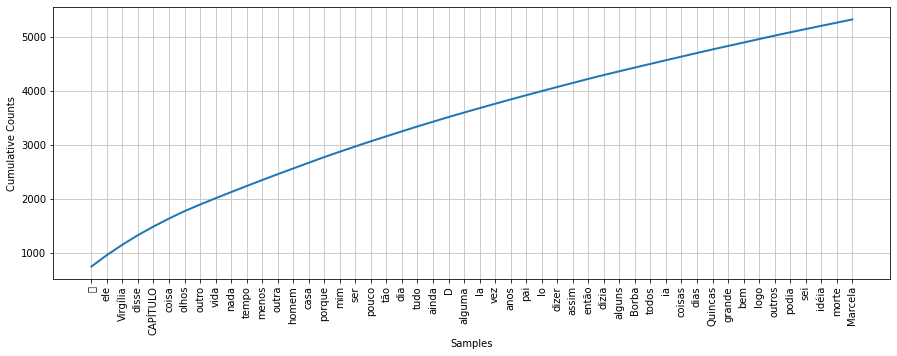

In [21]:
plt.figure(figsize=(15, 5))
fd.plot(50, cumulative=True);

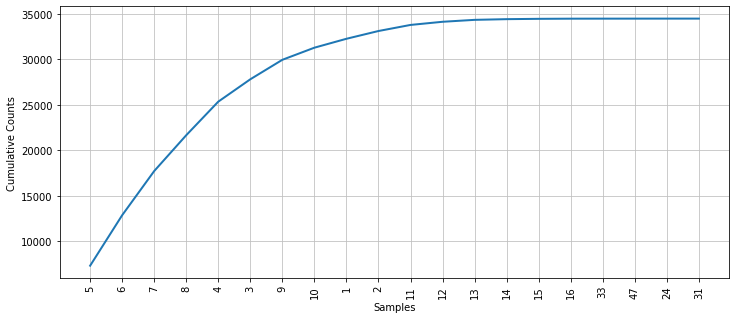

In [22]:
plt.figure(figsize=(12, 5))
FreqDist([len(w) for w in mpbc_words_clean]).plot(20, cumulative=True);

Hápax é uma expressão que designa uma palavra que se utilizou ou registrou apenas uma vez num corpus.

In [23]:
fd.hapaxes()

['Romance',
 'Texto',
 'Completa',
 'Editora',
 'Aguilar',
 '1994',
 'Publicado',
 'originalmente',
 'folhetins',
 'roeu',
 'dedico',
 'Prólogo',
 'Postas',
 'rever',
 'emendei',
 'suprimi',
 'composta',
 'encontrado',
 'Capistrano',
 'Abreu',
 'noticiando',
 'Soares',
 'recordava',
 'amigamente',
 'Viagens',
 'Toda',
 'Garret',
 'modelos',
 'taça',
 'lavores',
 'LEITOR',
 'consterna',
 'consternará',
 'Dez',
 'tinta',
 'antever',
 'poderá',
 'conúbio',
 'frívola',
 'privado',
 'frívolos',
 'angariar',
 'simpatias',
 'explícito',
 'contém',
 'truncado',
 'Conseguintemente',
 'evito',
 'trabalhadas',
 'nimiamente',
 'extenso',
 'desnecessário',
 'ÓBITO',
 'poria',
 'Suposto',
 'considerações',
 'adotar',
 'propriamente',
 'campa',
 'Moisés',
 'intróito',
 'radical',
 'Pentateuco',
 'expirei',
 'agosto',
 'Catumbi',
 'rijos',
 'prósperos',
 'Onze',
 'anúncios',
 'peneirava',
 'chuvinha',
 'fiéis',
 'engenhosa',
 'proferiu',
 'beira',
 'conhecestes',
 'chorando',
 'perda',
 'gotas',
 'cob

In [24]:
from nltk.corpus import floresta

In [25]:
print (floresta.readme())

Portuguese Treebank

Projecto Floresta Sinta(c)tica -- http://www.linguateca.pt/Floresta/
Version 7.4  Distributed with permission.

Penn Treebank format, available from http://linguateca.di.uminho.pt/FS/fs.html

Key to tags (http://visl.sdu.dk/visl/pt/portsymbol.html)

<ACC          direct object
<ACC-PASS     passive use of pronoun 'se'
<ADVS, <ADVO  adverbial argument
<ADVL         adjunct adverbial
<DAT          dative (indirect) object
<FOC          focus marker (or right focus bracket)
<OC           object complement
<PASS         agent of passive
<PIV          prepositional object
<PRED         free (subject) predicative, right of main verb
<SC           subject complement
<SUBJ         subject
>A            adverbial pre-adject (intensifier before adjective, adverb, pronoun or participle)
>N            prenominal modifier
>P            modifier of prepositional phrase (intensifier, operator or focus adverb)
>S            modifier of clause (intensifier, operator or focus adverb

In [26]:
from nltk.corpus import mac_morpho

In [27]:
print(mac_morpho.readme())

MAC-MORPHO: Brazilian Portuguese news text with part-of-speech tags

1,167,183 words of journalistic texts extracted from ten sections of
the daily newspaper Folha de Sau Paulo, 1994.  (Version for training taggers.)

http://www.nilc.icmc.usp.br/lacioweb/

Distributed with permission of
NÃºcleo Interinstitucional de LingÃ¼Ã­stica Computacional (NILC),
Universidade de SÃ£o Paulo (USP) in SÃ£o Carlos,
Universidade Federal de SÃ£o Carlos (UFSCar),
Universidade Estadual Paulista (UNESP) of Araraquara.



### Ngrams

In [28]:
from nltk import ngrams

In [29]:
list(ngrams(['De', 'Brás', 'Cubas', 'se', 'pode', 'dizer', 'que', 'viajou', 'à', 'roda', 'da', 'vida'], 2))

[('De', 'Brás'),
 ('Brás', 'Cubas'),
 ('Cubas', 'se'),
 ('se', 'pode'),
 ('pode', 'dizer'),
 ('dizer', 'que'),
 ('que', 'viajou'),
 ('viajou', 'à'),
 ('à', 'roda'),
 ('roda', 'da'),
 ('da', 'vida')]

In [30]:
FreqDist(ngram for ngram in ngrams(mpbc_words, 5) if 'Virgília' in ngram).most_common(5)

[(('.', 'A', 'beleza', 'de', 'Virgília'), 2),
 (('à', 'casa', 'de', 'Virgília', '.'), 2),
 (('importa', 'saber', 'é', 'que', 'Virgília'), 1),
 (('saber', 'é', 'que', 'Virgília', '\x97'), 1),
 (('é', 'que', 'Virgília', '\x97', 'chamava'), 1)]

In [31]:
from nltk.probability import ConditionalFreqDist

In [32]:
cdf = ConditionalFreqDist(ngrams(mpbc_words_clean, 2))

In [33]:
cdf['amigo'].most_common(5)

[('arrependo', 1),
 ('alguma', 1),
 ('Naturalmente', 1),
 ('detivera', 1),
 ('outro', 1)]

### Tokenização (nltk.tokenize)

#### Sentenças

In [34]:
sent_tokenizer = nltk.data.load('tokenizers/punkt/portuguese.pickle')

paragrafo = "Capistrano de Abreu, noticiando a publicação do livro, perguntava: As Memórias Póstumas de Brás Cubas são um romance? Macedo Soares, em carta que me escreveu por esse tempo, recordava amigamente as Viagens na minha terra. Ao primeiro respondia já o defunto Brás Cubas (como o leitor viu e verá no prólogo dele que vai adiante) que sim e que não, que era romance para uns e não o era para outros. Quanto ao segundo, assim se explicou o finado: Trata-se de uma obra difusa, na qual eu, Brás Cubas, se adotei a forma livre de um Sterne ou de um Xavier de Maistre, não sei se lhe meti algumas rabugens de pessimismo. Toda essa gente viajou: Xavier de Maistre à roda do quarto, Garret na terra dele, Sterne na terra dos outros. De Brás Cubas se pode dizer que viajou à roda da vida."

sentences = sent_tokenizer.tokenize(paragrafo)
print (paragrafo)
print()
for sent in sentences:
    print("<<", sent, ">>")

Capistrano de Abreu, noticiando a publicação do livro, perguntava: As Memórias Póstumas de Brás Cubas são um romance? Macedo Soares, em carta que me escreveu por esse tempo, recordava amigamente as Viagens na minha terra. Ao primeiro respondia já o defunto Brás Cubas (como o leitor viu e verá no prólogo dele que vai adiante) que sim e que não, que era romance para uns e não o era para outros. Quanto ao segundo, assim se explicou o finado: Trata-se de uma obra difusa, na qual eu, Brás Cubas, se adotei a forma livre de um Sterne ou de um Xavier de Maistre, não sei se lhe meti algumas rabugens de pessimismo. Toda essa gente viajou: Xavier de Maistre à roda do quarto, Garret na terra dele, Sterne na terra dos outros. De Brás Cubas se pode dizer que viajou à roda da vida.

<< Capistrano de Abreu, noticiando a publicação do livro, perguntava: As Memórias Póstumas de Brás Cubas são um romance? >>
<< Macedo Soares, em carta que me escreveu por esse tempo, recordava amigamente as Viagens na min

#### Palavras

In [35]:
sent = "Quanto ao segundo, assim se explicou o finado: Trata-se de uma obra difusa, na qual eu, Brás Cubas, se adotei a forma livre de um Sterne ou de um Xavier de Maistre, não sei se lhe meti algumas rabugens de pessimismo."

print (sent)
print ()
print (nltk.word_tokenize(sent, language='portuguese'))

Quanto ao segundo, assim se explicou o finado: Trata-se de uma obra difusa, na qual eu, Brás Cubas, se adotei a forma livre de um Sterne ou de um Xavier de Maistre, não sei se lhe meti algumas rabugens de pessimismo.

['Quanto', 'ao', 'segundo', ',', 'assim', 'se', 'explicou', 'o', 'finado', ':', 'Trata-se', 'de', 'uma', 'obra', 'difusa', ',', 'na', 'qual', 'eu', ',', 'Brás', 'Cubas', ',', 'se', 'adotei', 'a', 'forma', 'livre', 'de', 'um', 'Sterne', 'ou', 'de', 'um', 'Xavier', 'de', 'Maistre', ',', 'não', 'sei', 'se', 'lhe', 'meti', 'algumas', 'rabugens', 'de', 'pessimismo', '.']


In [36]:
nltk.word_tokenize("d'água", language='portuguese')

["d'água"]

### Lematização/Radiciação (nltk.stem)

RSLP = Removedor de Sufixo da Língua Portuguesa (http://www.inf.ufrgs.br/~viviane/rslp/index.htm)

In [37]:
from nltk.stem import RSLPStemmer, SnowballStemmer

In [38]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem("copiar")

'copi'

In [39]:
stemmer.stem("paisagem")

'pais'

In [40]:
stemmer = nltk.stem.SnowballStemmer(language='portuguese')
stemmer.stem("copiar"), stemmer.stem("paisagem")

('copi', 'paisag')

Comparando os stemmers

In [41]:
rslp_stemmer = nltk.stem.RSLPStemmer()
snow_stemmer = SnowballStemmer(language='portuguese')

counter = 0
for w in mpbc_words_clean:
    if rslp_stemmer.stem(w) != snow_stemmer.stem(w):
        print (w, rslp_stemmer.stem(w), snow_stemmer.stem(w))
        counter += 1
    if counter > 10:
        break

Brás brá brás
Brás brá brás
Obra obr obra
Assis assil assis
Janeiro jan janeir
Editora edit editor
originalmente orig original
folhetins folhetim folhetins
março març marc
Brasileira brasil brasileir
primeiro prim primeir


Objetivo Stemming/Lemmatization: redução de dimensionalidade.

In [42]:
print ('%d palavras' % len(mpbc_words))

print ('%d palavras únicas' % len(set(mpbc_words_clean)))

print ('%d radicais únicos (RSLP)' % len(set([rslp_stemmer.stem(w) for w in mpbc_words_clean])))

print ('%d radicais únicos (Snowball)' % len(set([snow_stemmer.stem(w) for w in mpbc_words_clean])))

77098 palavras
10547 palavras únicas
5089 radicais únicos (RSLP)
5615 radicais únicos (Snowball)


In [43]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

wnl.lemmatize('copiar'), wnl.lemmatize('amando')

('copiar', 'amando')

### Collocations (nltk.collocations) 

Uma `collocation` é uma sequência de palavras que aparecem frequentemente juntas. Por ex.: vinho tinto, Rio de Janeiro, ... Collocations são ngramas frequentes.

In [44]:
mpbc.collocations()

Quincas Borba; Lobo Neves; alguma coisa; Brás Cubas; meu pai; que não;
dia seguinte; não sei; Com efeito; que era; Meu pai; alguns instantes;
outra vez; outra coisa; por exemplo; que ele; mim mesmo; coisa
nenhuma; mesma coisa; não era


In [45]:
FreqDist(ngram for ngram in ngrams(mpbc_words_clean, 2)).most_common(10)

[(('Quincas', 'Borba'), 65),
 (('D', 'Plácida'), 56),
 (('Lobo', 'Neves'), 51),
 (('alguma', 'coisa'), 44),
 (('Brás', 'Cubas'), 29),
 (('disse', 'ele'), 26),
 (('outra', 'coisa'), 22),
 (('D', 'Eusébia'), 21),
 (('dia', 'seguinte'), 21),
 (('outra', 'vez'), 21)]

In [46]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder

PMI = Pointwise mutual information.

pmi(x,y) = log p(x,y) / p(x)p(y); sendo x e y resultados de duas variáveis aleatórias X e Y, a PMI mede a discrepância entre a sua probabilidade conjunta e suas distribuições individuais, assumindo independência.

PMI é um conceito recorrente em NLP. Tipicamente o texto é fracionado em janelas e a probabilidade conjunta representa o número de vezes em que as palavras x e y co-ocorreram na janela, enquanto as probabilidades p(x) e p(y) representam as ocorrências individuais dos termos. Dessa forma, essa medida incorpora o contexto em que as palavras estão inseridas.

In [47]:
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(mpbc_words)
finder.nbest(bigram_measures.pmi, 10)

[('***,', 'exerci'),
 ('.............................',
  '..........!..............................!...........................!'),
 ('..................................................',
  '.......................................................'),
 ('..............................................................................................',
  '.............................'),
 ('................................................................................................',
  '........................................................'),
 ('..........................................................................................................................................................?',
  '..................................................'),
 ('7', '):'),
 ('ABRAÇO', 'Cuidei'),
 ('ALMA', 'SENSÍVEL'),
 ('AOS', 'DEZENOVE')]

In [48]:
finder.apply_freq_filter(3)
finder.nbest(bigram_measures.pmi, 10)

[('Passeio', 'Público'),
 ('Nossa', 'Senhora'),
 ('Virgem', 'Nossa'),
 ('Memórias', 'Póstumas'),
 ('BRÁS', 'CUBAS'),
 ('arma', 'virumque'),
 ('virumque', 'cano'),
 ('guarda', 'nacional'),
 ('Sem', 'filhos'),
 ('d', "'")]

In [49]:
bigram_measures = TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(mpbc_words)
finder.apply_freq_filter(3)
finder.nbest(bigram_measures.pmi, 10)

[('Virgem', 'Nossa', 'Senhora'),
 ('arma', 'virumque', 'cano'),
 ('Virgílio', 'Virgílio', 'Virgílio'),
 ('*', '*', '*'),
 ('Câmara', 'dos', 'Deputados'),
 ('Meu', 'tio', 'cônego'),
 ('no', 'Passeio', 'Público'),
 ('caro', 'Brás', 'Cubas'),
 ('sacristão', 'da', 'Sé'),
 ('Sem', 'filhos', '!')]

### Part-of-Speech (POS) Tagging (nltk.tag) 

In [50]:
tsents = floresta.tagged_sents()
tsents[0]

[('Um', '>N+art'), ('revivalismo', 'H+n'), ('refrescante', 'N<+adj')]

In [51]:
twords = floresta.tagged_words()
twords[0]

('Um', '>N+art')

In [52]:
def simplify_tag(*args):
    w, t = args[0]
    if "+" in t:
        return w, t[t.index("+") + 1:].upper()
    return w, t.upper()
def simplify_sent(s):
    return [simplify_tag(t) for t in s]

In [53]:
simplify_sent(tsents[0])

[('Um', 'ART'), ('revivalismo', 'N'), ('refrescante', 'ADJ')]

In [54]:
simplify_tag(twords[0])

('Um', 'ART')

In [55]:
floresta_text = Text(floresta.words(), name='Floresta corpus')

In [56]:
floresta_text.concordance('mulher')

Displaying 25 of 35 matches:
mal , mas muito mal , pois marido e mulher agora só partilhavam uma filha , um
cto , dava a impressão que marido e mulher , em esta última fase de o casament
e Josette que torturava ratos , uma mulher casada , um marido e um amante , e 
ondenado a 15 anos por a morte de a mulher , ter cumprido apenas seis . Fala e
nhora patinagem » Katarina_Witt , a mulher que explicou o facto de ser « sexy 
 meses mais tarde , a imagem de uma mulher chorando a perda de os seus oito fi
- la e abraça- la . Subitamente , a mulher empoada recolhe todo_o seu afecto e
seu « antigo amigo e camarada » . A mulher de Honecker , Margot , abandonou on
o de moda , está a dormir com a sua mulher , Elle_MacPherson , « top_model » a
or a mãe natural e criada por outra mulher que reconhece como mãe . A primeira
nse é a razão que teria levado esta mulher doente Wendi tem esclerose múltipla
tidas ? Nunca forçar a decisão de a mulher « Qualquer tentativa de forçar a mu
er « Qualquer tentativa

In [57]:
tagged_words_pairs = list(ngrams([simplify_tag(t) for t in floresta.tagged_words()], 2))

In [58]:
list(tagged_words_pairs)[0]

(('Um', 'ART'), ('revivalismo', 'N'))

In [59]:
nltk.help.upenn_tagset('N')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [60]:
[
    bigram_tagged for bigram_tagged in tagged_words_pairs 
    if 
        'mulher' == bigram_tagged[0][0]
    and 
        bigram_tagged[1][1] == 'ADJ'
]

[(('mulher', 'N'), ('doente', 'ADJ'))]

In [61]:
[
    bigram_tagged for bigram_tagged in tagged_words_pairs 
    if 
        'homem' == bigram_tagged[0][0]
    and 
        bigram_tagged[1][1] == 'ADJ'
]

[(('homem', 'N'), ('simpático', 'ADJ')),
 (('homem', 'N'), ('impassível', 'ADJ')),
 (('homem', 'N'), ('alto', 'ADJ')),
 (('homem', 'N'), ('rico', 'ADJ'))]

In [62]:
cfd_tagged = ConditionalFreqDist([simplify_tag(t) for t in floresta.tagged_words()])

In [63]:
cfd_tagged['espera']

FreqDist({'V-FIN': 16, 'N': 12})

In [64]:
cfd_tagged_reverse = ConditionalFreqDist([simplify_tag(t)[::-1] for t in floresta.tagged_words()])

In [65]:
cfd_tagged_reverse.keys()

dict_keys(['ART', 'N', 'ADJ', 'PROP', 'V-FIN', 'PRP', '.', 'NUM', 'ADV', ',', 'V-PCP', 'PRON-INDP', 'V-INF', 'CONJ-C', '«', 'PRON-DET', 'PRON-PERS', 'CONJ-S', '?', 'PP', 'V-GER', '{', '}', ';', '»', '!', 'IN', '[', ']', "'", 'EC', '/', '"', '-', 'PRP-', '*', "N<{'185/60_R_14'}", 'VP', '2]+ADV'])

In [66]:
cfd_tagged_reverse['ART']

FreqDist({'o': 9689, 'a': 9012, 'os': 3122, 'as': 2115, 'um': 1551, 'uma': 1386, 'O': 1070, 'A': 808, 'Os': 304, 'As': 148, ...})

In [67]:
cfd_tagged_reverse['N']

FreqDist({'anos': 299, 'milhões': 195, 'ano': 190, 'dia': 180, '%': 179, 'país': 147, 'US$': 146, 'pessoas': 144, 'contos': 131, 'por_cento': 131, ...})

In [68]:
cfd_tagged_reverse['ADJ']

FreqDist({'maior': 128, 'primeiro': 125, 'primeira': 108, 'novo': 105, 'grande': 105, 'nova': 90, 'grandes': 68, 'melhor': 68, 'nacional': 59, 'último': 57, ...})

In [69]:
cfd_tagged_reverse['ADV']

FreqDist({'não': 1207, 'mais': 557, 'como': 538, 'também': 281, 'ontem': 271, 'já': 269, 'ainda': 264, 'só': 185, 'muito': 173, 'onde': 168, ...})

In [70]:
cfd_tagged_reverse['V-GER']

FreqDist({'sendo': 40, 'tendo': 39, 'passando': 16, 'fazendo': 12, 'incluindo': 12, 'ganhando': 11, 'dando': 11, 'estando': 10, 'dizendo': 8, 'Sendo': 7, ...})

#### Link externo: Treinamento de POS tagger para pt-BR

Referência: https://github.com/inoueMashuu/POS-tagger-portuguese-nltk/blob/master/treinamento_POS_taggers.ipynb

In [71]:
import numpy as np

O NLTK conta com dois corpora com POS tagging para língua portuguesa: Floresta e Mac Morpho. O segundo é composto exclusivamente por notícias publicadas na Folha de São Paulo e por isso temos apenas o pt-BR presente. Vamos trabalhar com ele para este modelo.

In [72]:
dataset = list(nltk.corpus.mac_morpho.tagged_sents())

In [73]:
print ('%d sentenças' % len(dataset))

51397 sentenças


In [74]:
dataset[0]

[('Jersei', 'N'),
 ('atinge', 'V'),
 ('média', 'N'),
 ('de', 'PREP'),
 ('Cr$', 'CUR'),
 ('1,4', 'NUM'),
 ('milhão', 'N'),
 ('em', 'PREP|+'),
 ('a', 'ART'),
 ('venda', 'N'),
 ('de', 'PREP|+'),
 ('a', 'ART'),
 ('Pinhal', 'NPROP'),
 ('em', 'PREP'),
 ('São', 'NPROP'),
 ('Paulo', 'NPROP')]

A primeira etapa é a divisão do dataset em dados de treino (80%) e teste (20%)

In [75]:
tshld = int(np.ceil(len(dataset)*.8))

train_data = dataset[:tshld]
test_data = dataset[tshld:]

print (len(train_data), len(test_data))

41118 10279


Vamos criar um modelo de baseline para termos um critério de comparação. O DefaultTagger classifica todas as palavras como substantivo.

In [76]:
t_def = nltk.DefaultTagger('N')

print('''Acurácia Default Tagger: {:.2f}%'''.format(t_def.evaluate(test_data) * 100))

Acurácia Default Tagger: 19.68%


Um tagger mais sofisticado é o UnigramTagger, onde apenas o token é considerado para decidir sua função sintática. Ele funciona atribuindo a tag mais frequente ao token. 

In [77]:
t_uni = nltk.UnigramTagger(train_data)

Primeiro observamos o comportamento do tagger para palavras não existentes nos dados de treinamento. Repare que o tagger não é capaz de atribuir nenhuma classificação nesse caso. 

In [78]:
'probema' in nltk.corpus.mac_morpho.words()

False

In [79]:
t_uni.tag(['probema'])

[('probema', None)]

Pelo motivo acima, usamos o artifício do backoff, um tagger a ser utilizado nesse tipo de situação.

In [80]:
t_uni = nltk.UnigramTagger(train_data, backoff=t_def)

print('''Acurácia Unigram Tagger: {:.2f}%'''.format(t_uni.evaluate(test_data) * 100))

Acurácia Unigram Tagger: 81.52%


Ao contrário do UnigramTagger, os NgramTagger utilizam o contexto em que a palavra está inserida. O TrigramTagger, por exemplo, considera as duas palavras anteriores à palavra que deseja-se classificar.

In [81]:
t_bi = nltk.BigramTagger(train_data, backoff=t_uni)
t_tri = nltk.TrigramTagger(train_data, backoff=t_bi)

print('''Acurácia Bigram Tagger: {:.2f}%'''.format(t_bi.evaluate(test_data) * 100))
print('''Acurácia Trigram Tagger: {:.2f}%'''.format(t_tri.evaluate(test_data) * 100))

Acurácia Bigram Tagger: 82.96%
Acurácia Trigram Tagger: 82.96%


Como o o bigram e o trigram tiveram o mesmo desempenho, vamos salvar o modelo mais simples.

In [82]:
import joblib
joblib.dump(t_bi, 'out/POS_tagger_pt.pkl')

['out/POS_tagger_pt.pkl']

Testando

In [83]:
pt_tagger = joblib.load('out/POS_tagger_pt.pkl')

pt_tagger.tag(nltk.word_tokenize('Esta é uma frase de teste da aula de NLP.'))

[('Esta', 'PROADJ'),
 ('é', 'V'),
 ('uma', 'ART'),
 ('frase', 'N'),
 ('de', 'PREP'),
 ('teste', 'N'),
 ('da', 'N'),
 ('aula', 'N'),
 ('de', 'PREP'),
 ('NLP', 'N'),
 ('.', '.')]

### Classificação de Textos (nltk.classify, nltk.cluster, nltk.tbl)

Classificação: consiste em associar o rótulo correto a uma determinada entrada.
- Supervisionada: é quando os dados de treinamento associam determinada entrada a uma classe. Ex.: classificação de spam, classificação de documentos

Pré-requisito desta seção: Teorema de Bayes

#### Link externo: Spelling Corrector (Peter Norvig)

Ilustração de como o teorema de Bayes pode ser útil para implementação de problemas comuns em NLP.

Referência: https://norvig.com/spell-correct.html

Dicionário pt-BR: https://github.com/pythonprobr/palavras

**Passo 1:** cálculo de P(c)

In [84]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('in/palavras.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

In [85]:
WORDS.most_common(5)

[('de', 8035), ('do', 4225), ('da', 2745), ('dos', 729), ('pau', 642)]

In [86]:
sum(WORDS.values())

391573

In [87]:
P('de')

0.02051980090557827

**Passo 2:** gerar candidatos

In [88]:
def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [89]:
word = 'probema'

print ('%d candidatos' % len(list(edits2(word))))

162150 candidatos


In [90]:
def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

In [91]:
candidates('probema')

{'problema', 'prolema', 'proxema'}

**Passo 3:** escolher a correção mais provável

In [92]:
def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

In [93]:
candidates('probema')

{'problema', 'prolema', 'proxema'}

In [94]:
P('problema'), P('prolema'), P('proxema')

(1.787661559913477e-05, 2.5538022284478247e-06, 2.5538022284478247e-06)

In [95]:
correction('probema')

'problema'

In [96]:
correction('maxado')

'baxado'

#### Classificação de Spam

Vamos ver como utilizar o teorema de Bayes para construir um classificador de spam. O objetivo aqui é ver como utilizar o classificador disponível no NLTK.

Caso você tenha interesse sobre o problema em si, sugiro consultar outras referências online, pois esse é um problema clássico e muito debatido em NLP. É também a prova de como o Naive Bayes, apesar de suposição "inocente" de independência, apresenta bom desempenho para alguns casos.

In [97]:
import pandas as pd

In [98]:
spam_df = pd.read_csv('in/spam/data.csv')
spam_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [99]:
spam_df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [100]:
spam_df['Message_Len'] = spam_df['Message'].str.len()
spam_df.head(2)

,Category,Message,Message_Len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


In [101]:
spam_df.groupby('Category')['Message_Len'].median()

Category
ham      52
spam    149
Name: Message_Len, dtype: int64

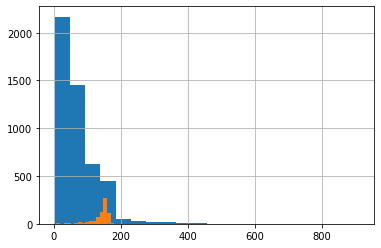

In [102]:
spam_df[spam_df.Category == 'ham']['Message_Len'].hist(bins=20)
spam_df[spam_df.Category == 'spam']['Message_Len'].hist(bins=20);

In [103]:
stopwords_en = nltk.corpus.stopwords.words('english')

In [104]:
spam_word_list = spam_df[spam_df.Category == 'spam']['Message'].apply(nltk.word_tokenize)
spam_words = []
for word_list in spam_word_list:
    spam_words.extend(word_list)
FreqDist([w for w in spam_words if (w not in stopwords_en) and (not is_pontuacao(w))]).most_common(50)

[('call', 185),
 ('2', 176),
 ('&', 175),
 ('Call', 138),
 ('4', 122),
 ('FREE', 115),
 ('*', 115),
 ('ur', 107),
 ('mobile', 95),
 ('U', 88),
 ('You', 82),
 ('claim', 76),
 ('Txt', 75),
 ('To', 74),
 ('text', 73),
 ('txt', 71),
 ('prize', 71),
 ('Your', 71),
 (')', 66),
 ("'s", 66),
 ('T', 63),
 ('STOP', 63),
 ('free', 62),
 ('reply', 58),
 ('contact', 55),
 ('(', 54),
 ('u', 53),
 ('week', 50),
 ('service', 49),
 ('send', 47),
 ('C', 46),
 ('per', 46),
 ('Nokia', 46),
 ('get', 45),
 ('NOW', 45),
 ('Reply', 44),
 ('stop', 44),
 ('cash', 43),
 ('Free', 42),
 ('I', 42),
 ('new', 42),
 ('Cs', 41),
 ('Text', 40),
 ('URGENT', 40),
 ('This', 40),
 ('customer', 39),
 ('No', 38),
 ('We', 37),
 ('awarded', 37),
 ('1', 36)]

In [105]:
spam_word_list = spam_df[spam_df.Category == 'ham']['Message'].apply(nltk.word_tokenize)
spam_words = []
for word_list in spam_word_list:
    spam_words.extend(word_list)
FreqDist([w for w in spam_words if (w not in stopwords_en) and (not is_pontuacao(w))]).most_common(50)

[('I', 1933),
 ('&', 744),
 ('u', 734),
 ('..', 685),
 (')', 433),
 ("'s", 423),
 ("'m", 387),
 ("n't", 348),
 ('gt', 318),
 ('lt', 316),
 ('2', 313),
 ('get', 290),
 ('#', 281),
 ('U', 272),
 ('go', 233),
 ('know', 230),
 ("'ll", 229),
 ('like', 221),
 ('got', 213),
 ('come', 210),
 ('You', 207),
 ('call', 205),
 ('*', 196),
 ('ur', 191),
 ('4', 178),
 ('day', 174),
 ('time', 173),
 ('lor', 162),
 ('home', 156),
 ('going', 153),
 ('want', 152),
 ('How', 152),
 ('one', 150),
 ('good', 148),
 ('need', 144),
 ('No', 143),
 ('love', 141),
 ('da', 139),
 ('But', 137),
 ('n', 136),
 ('Ok', 136),
 ('still', 133),
 ('later', 128),
 ('``', 126),
 ('Do', 124),
 ("''", 122),
 ('back', 121),
 ('ü', 120),
 ('So', 119),
 ('If', 119)]

In [106]:
def extract_features(idx):
    
    message = spam_df.iloc[idx]['Message'].lower()
    
    features = {}
    features['message_length'] = len(message)
    features['has_free'] = 'free' in message
    features['has_txt'] = 'txt' in message
    features['has_award'] = 'award' in message
    features['has_ur'] = 'ur' in message
    features['has_claim'] = 'claim' in message
    features['has_urgent'] = 'urgent' in message
    features['has_prize'] = 'prize' in message
    features['has_call'] = 'call' in message

    return features, spam_df.iloc[idx].Category

In [107]:
spam_df.head(2)

,Category,Message,Message_Len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


In [108]:
from nltk.classify import apply_features

In [109]:
train_set = apply_features(extract_features, range(spam_df.index.size)[:4000])
test_set = apply_features(extract_features, range(spam_df.index.size)[4000:])

In [110]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [111]:
nltk.classify.accuracy(classifier, test_set) 

0.9414758269720102

In [112]:
from nltk.metrics import f_measure, ConfusionMatrix

In [113]:
cm = ConfusionMatrix([t[1] for t in test_set], classifier.classify_many([t[0] for t in test_set]))

In [114]:
print(cm.pretty_format())

     |         s |
     |    h    p |
     |    a    a |
     |    m    m |
-----+-----------+
 ham |<1330>  29 |
spam |   63 <150>|
-----+-----------+
(row = reference; col = test)



In [115]:
classifier.show_most_informative_features(10)

Most Informative Features
               has_award = True             spam : ham    =    183.6 : 1.0
                 has_txt = True             spam : ham    =     95.2 : 1.0
              has_urgent = True             spam : ham    =     42.4 : 1.0
          message_length = 161              spam : ham    =     29.4 : 1.0
                has_free = True             spam : ham    =     20.4 : 1.0
          message_length = 162              spam : ham    =     12.7 : 1.0
          message_length = 152              spam : ham    =     11.6 : 1.0
          message_length = 143              spam : ham    =     11.4 : 1.0
          message_length = 146              spam : ham    =     10.4 : 1.0
          message_length = 157              spam : ham    =     10.3 : 1.0
